#DESCRIPTIVE STATISTICS : PREPARATION AND ANALYSIS OF DATA#

* **AUTHOR**     : Aakash Kathirvel             

* **VID**        : V01110153

* **CREATED ON** : 06/16/2024

**PROBLEM STATEMENT**: ANALYSIS OF COMSUMPTION IN THE STATE OF MEGHALAYA(STATE CODE-17)


**ABOUT DATASET** : This dataset is about 68th round of National Sample Survey Organisation (NSSO) survey

In [293]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [294]:
import warnings
warnings.filterwarnings("ignore")

In [295]:
#READING ONLY BIHAR DATA FROM NSS068 DATSET
MEGData = pd.read_csv("NSSO68.csv")

In [296]:
MEGData.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [297]:
meg = MEGData[MEGData['state_1']=="MEG"]

In [298]:
meg.state.unique()

array([17], dtype=int64)

In [299]:
meg.shape

(1259, 384)

#CHECK FOR MISSING VALUES #


In [300]:
meg.isnull().sum().sort_values(ascending = False)

soyabean_v                    1259
soyabean_q                    1259
Otherwise_possessed           1255
Land_Leased_out               1203
During_July_June_Irrigated    1045
                              ... 
chillig_q                        0
palak_q                          0
carrot_q                         0
radish_q                         0
fv_tot                           0
Length: 384, dtype: int64

In [301]:
#SUBSETTING ONLY CONSUMPTION RELATED VARIABLES
MEG = meg[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [302]:
MEG.isnull().sum().sort_values(ascending = False)

Meals_At_Home       8
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

***INFERENCE*** : Among the subsetted consumption variables only "Meals_At_Home" variable consists of 8 missing values which has to be handled.

# HANDLING MISSING VALUES #

In [303]:
MEG_clean = MEG.copy()
MEG_clean.loc[:, 'Meals_At_Home'] = MEG_clean['Meals_At_Home'].fillna(MEG['Meals_At_Home'].mean())

In [304]:
#CHECKING FOR MISSING VALUES AFTER IMPUTATION
new_var = MEG_clean.isnull().sum().sort_values(ascending = False)
new_var

state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
Meals_At_Home       0
dtype: int64

#CHECK FOR OUTLIERS#

In [305]:
MEG_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

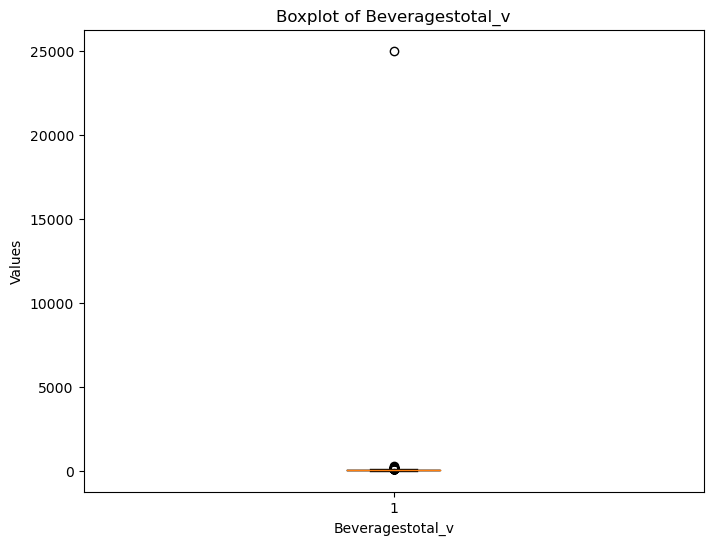

In [306]:
plt.figure(figsize=(8, 6))
plt.boxplot(MEG_clean['Beveragestotal_v'])
plt.xlabel('Beveragestotal_v')
plt.ylabel('Values')
plt.title('Boxplot of Beveragestotal_v')
plt.show()

#HANDLING OULIERS#

In [307]:
food1 = MEG_clean['Beveragestotal_v'].quantile(0.25)
food2 = MEG_clean['Beveragestotal_v'].quantile(0.75)
iqr_food = food2-food1
up_limit = food2 + 1.5*iqr_food
low_limit = food1 - 1.5*iqr_food

Text(0.5, 1.0, 'Boxplot of Beveragestotal_v')

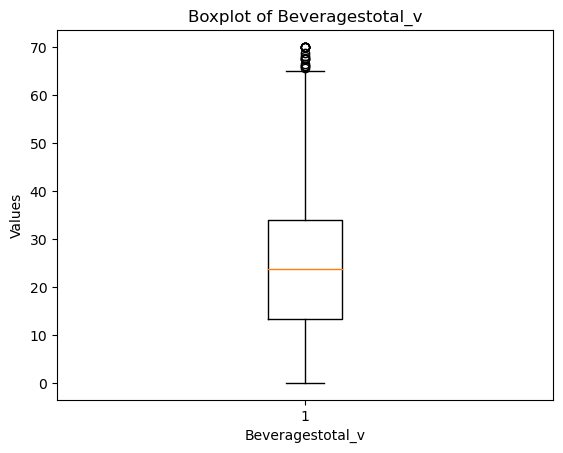

In [308]:
MEG_clean=MEG[(MEG['Beveragestotal_v']<=up_limit)&(MEG['Beveragestotal_v']>=low_limit)]
plt.boxplot(MEG_clean['Beveragestotal_v'])
plt.xlabel('Beveragestotal_v')
plt.ylabel('Values')
plt.title('Boxplot of Beveragestotal_v')

#SUMMARIZING CRITICAL VARIABLES#

In [309]:
MEG_clean['District'].unique()

array([6, 5, 4, 7, 3, 2, 1], dtype=int64)

In [310]:
MEG_clean.loc[:,'Sector'] = MEG_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [311]:
#total consumption
MEG_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [312]:
MEG_clean.loc[:, 'total_consumption'] = MEG_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [313]:
MEG_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
17685,MEG,6,RURAL,1,171,10.000000,1.666667,1.000000,0,0.333333,0.666667,29.850725,40.020000,60.0,83.537392
17686,MEG,6,RURAL,1,171,7.600000,1.200000,0.200000,0,0.000000,0.800000,30.091070,30.014000,60.0,69.905070
17687,MEG,6,RURAL,1,171,8.000000,0.750000,0.250000,0,0.000000,0.250000,24.750700,12.511250,60.0,46.511950
17688,MEG,6,RURAL,1,171,5.000000,4.000000,0.333333,0,0.666667,0.000000,23.234217,43.340000,60.0,76.574217
17690,MEG,6,RURAL,1,171,7.583333,0.500000,0.166667,0,0.166667,0.083333,20.300346,58.333333,60.0,87.133679


In [314]:
MEG_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              17.782264  54.237474  115.360572  0.0

In [315]:
MEG_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                16.913534  62.167749  115.360572  30.200165
2                15.589422  61.962874  114.844972  34.121701
3                16.110414  58.436434  100.521829  27.139304
4                15.069112  45.942231   99.900705  20.964404
5                15.906782  45.576013  104.733858  22.950116
6                18.332642  56.128705  103.750388   0.000000
7                13.949055  45.485462   93.400180  22.338088

#RENAMING DISTRICTS & SECTORS USING CODES FROM APPENDIX-NSSO68#

In [316]:
MEG_clean.loc[:,"District"] = MEG_clean.loc[:,"District"].replace({1: "West Garo Hills", 2: "East Garo Hills", 3: "South Garo Hills", 4: "West Khasi Hills", 5: "Ri Bhoi", 6: "East Khasi Hills", 7: "Jaintia Hills"})
total_consumption_by_districtname=MEG_clean.groupby('District')['total_consumption'].sum()

#DISPLAYING TOP 3 AND LAST 3 DISTRICTS OF CONSUMPTION#

In [317]:
total_consumption_by_districtcode=MEG_clean.groupby('District')['total_consumption'].sum()

In [318]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
East Khasi Hills    18634.730139
West Garo Hills     13925.575739
East Garo Hills      7621.433516
Name: total_consumption, dtype: float64

In [319]:
total_consumption_by_districtcode.sort_values(ascending=False).tail(3)

District
Jaintia Hills       6913.790299
Ri Bhoi             5742.577640
South Garo Hills    5142.406151
Name: total_consumption, dtype: float64

In [320]:
from statsmodels.stats import weightstats as stests
rural=MEG_clean[MEG_clean['Sector']=="RURAL"]
urban=MEG_clean[MEG_clean['Sector']=="URBAN"]

In [321]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
17685,MEG,East Khasi Hills,RURAL,1,171,10.000000,1.666667,1.000000,0,0.333333,0.666667,29.850725,40.020000,60.0,83.537392
17686,MEG,East Khasi Hills,RURAL,1,171,7.600000,1.200000,0.200000,0,0.000000,0.800000,30.091070,30.014000,60.0,69.905070
17687,MEG,East Khasi Hills,RURAL,1,171,8.000000,0.750000,0.250000,0,0.000000,0.250000,24.750700,12.511250,60.0,46.511950
17688,MEG,East Khasi Hills,RURAL,1,171,5.000000,4.000000,0.333333,0,0.666667,0.000000,23.234217,43.340000,60.0,76.574217
17690,MEG,East Khasi Hills,RURAL,1,171,7.583333,0.500000,0.166667,0,0.166667,0.083333,20.300346,58.333333,60.0,87.133679


In [322]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
47557,MEG,Ri Bhoi,URBAN,1,171,10.333333,0.333333,0.00,0,0.000000,0.0,16.453667,25.000000,56.0,52.120333
47558,MEG,Ri Bhoi,URBAN,1,171,10.333333,0.166667,0.00,0,0.166667,0.0,16.075208,16.666667,56.0,43.408542
47559,MEG,Ri Bhoi,URBAN,1,171,11.000000,0.000000,0.00,0,0.200000,0.0,15.510260,20.000000,56.0,46.710260
47560,MEG,Ri Bhoi,URBAN,1,171,10.571429,0.142857,0.00,0,0.142857,0.0,14.043043,17.142857,56.0,42.043043
47561,MEG,Ri Bhoi,URBAN,1,171,10.500000,0.000000,0.15,0,0.200000,0.0,14.055183,11.000000,60.0,35.905183


#TEST FOR DIFFERENCES IN MEAN CONSUMPTION AMONG RURAL AND URBAN SECTORS#

In [323]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 2.006802685776415
P-Value: 0.04477067678874531


In [324]:
# H1: There is a significant difference between mean consumptions of urban and rural sectors
# Ho: There is no significant difference between mean consumptions of urban and rural sectors

# Checking p-value against significance level(0.05)
if p_value < 0.05:
    print("Reject Ho: There is a significant difference between mean consumptions of urban and rural sectors.")
else:
    print("Fail to reject Ho: There is no significant difference between mean consumptions of urban and rural sectors.")

Reject Ho: There is a significant difference between mean consumptions of urban and rural sectors.


INFERENCE : Since Pvalue is less that 0.05 we conclude that there is a significant difference between mean consumptions of urban and rural sectors.This conclusion implies
that the data provides sufficient evidence to reject the idea that there is no difference in mean consumptions between urban and rural sectors. Instead, it suggests that there 
 is indeed a meaningful difference between these two groups in terms of consumption levels.